In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn import metrics


In [3]:
#Validation set manually annotated 
Validationdata = pd.read_csv('data/ds.tsv',delimiter="\t")

#Set of posts samples (positive/control) filtered by their topical similarity with a depression taxonomy (Ht)
HT_data = pd.read_csv('data/ts_ht.tsv',delimiter="\t")

In [4]:

X_train = HT_data['pp_text']
X_test = Validationdata['pp_text']
y_train = HT_data['label']
y_test = Validationdata['label']
y_test

0      1
1      1
2      1
3      1
4      1
      ..
143    0
144    0
145    0
146    0
147    0
Name: label, Length: 148, dtype: int64

In [5]:


def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

en_stopwords = set(stopwords.words("english")) 

vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    ngram_range=(1, 1),
    stop_words = en_stopwords)

In [6]:

pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

pipeline_svm.fit(X_train, y_train)
pipeline_svm.score(X_test, y_test)

predicted_SVN = pipeline_svm.predict(X_test)
accuracy_score_sig = metrics.accuracy_score(predicted_SVN, y_test)
accuracy_score_auc = metrics.roc_auc_score(predicted_SVN, y_test)
accuracy_score_priv = metrics.precision_score(predicted_SVN, y_test)
accuracy_score_recall = metrics.recall_score(predicted_SVN, y_test)

print(accuracy_score_priv)
print(accuracy_score_recall)
print(accuracy_score_auc)
accuracy_score_sig


0.7636363636363637
0.8076923076923077
0.8361378205128206


0.8445945945945946

In [7]:
pipeline_svm = make_pipeline(vectorizer,
                             TfidfTransformer(),
                            SVC(probability=True, kernel="linear", class_weight="balanced"))


pipeline_svm.fit(X_train, y_train)
pipeline_svm.score(X_test, y_test)


predicted_SVN = pipeline_svm.predict(X_test)
accuracy_score_sig = metrics.accuracy_score(predicted_SVN, y_test)
accuracy_score_auc = metrics.roc_auc_score(predicted_SVN, y_test)
accuracy_score_priv = metrics.precision_score(predicted_SVN, y_test)
accuracy_score_recall = metrics.recall_score(predicted_SVN, y_test)

print(accuracy_score_priv)
print(accuracy_score_recall)
print(accuracy_score_auc)
accuracy_score_sig

0.8
0.8461538461538461
0.8657852564102564


0.8716216216216216

In [12]:

X_train = HT_data['pp_text']
X_test = Validationdata['pp_text']
y_train = HT_data['label']
y_test = Validationdata['label']

pipeline_multi_svm_poly = make_pipeline(vectorizer,
                             TfidfTransformer(),
                            SVC(probability=True, kernel='poly', class_weight="balanced"))

pipeline_multi_svm_poly.fit(X_train, y_train)
pipeline_multi_svm_poly.score(X_test, y_test)



predicted_SVN_poly = pipeline_multi_svm_poly.predict(X_test)
accuracy_score_sig_poly = metrics.accuracy_score(predicted_SVN_poly, y_test)
accuracy_score_auc_poly = metrics.roc_auc_score(predicted_SVN_poly, y_test)
accuracy_score_priv_poly = metrics.precision_score(predicted_SVN_poly, y_test)
accuracy_score_recall_poly = metrics.recall_score(predicted_SVN_poly, y_test)

print(accuracy_score_priv_poly)
print(accuracy_score_recall_poly)
print(accuracy_score_auc_poly)
accuracy_score_sig_poly

0.8181818181818182
0.9375
0.9187500000000001


0.9121621621621622

In [9]:

pipeline_multi_rbf = make_pipeline(vectorizer,
                             TfidfTransformer(),
                            SVC(probability=True, kernel='rbf', class_weight="balanced"))
pipeline_multi_rbf.fit(X_train, y_train)


predictedsvm = pipeline_multi_rbf.predict(X_test)
accuracy_score_sig = metrics.accuracy_score(predictedsvm, y_test)
accuracy_score_auc = metrics.roc_auc_score(predictedsvm, y_test)
accuracy_score_priv = metrics.precision_score(predictedsvm, y_test)
accuracy_score_recall = metrics.recall_score(predictedsvm, y_test)

print(accuracy_score_priv)
print(accuracy_score_recall)
print(accuracy_score_auc)
accuracy_score_sig

0.8363636363636363
0.8363636363636363
0.8697947214076247


0.8783783783783784

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

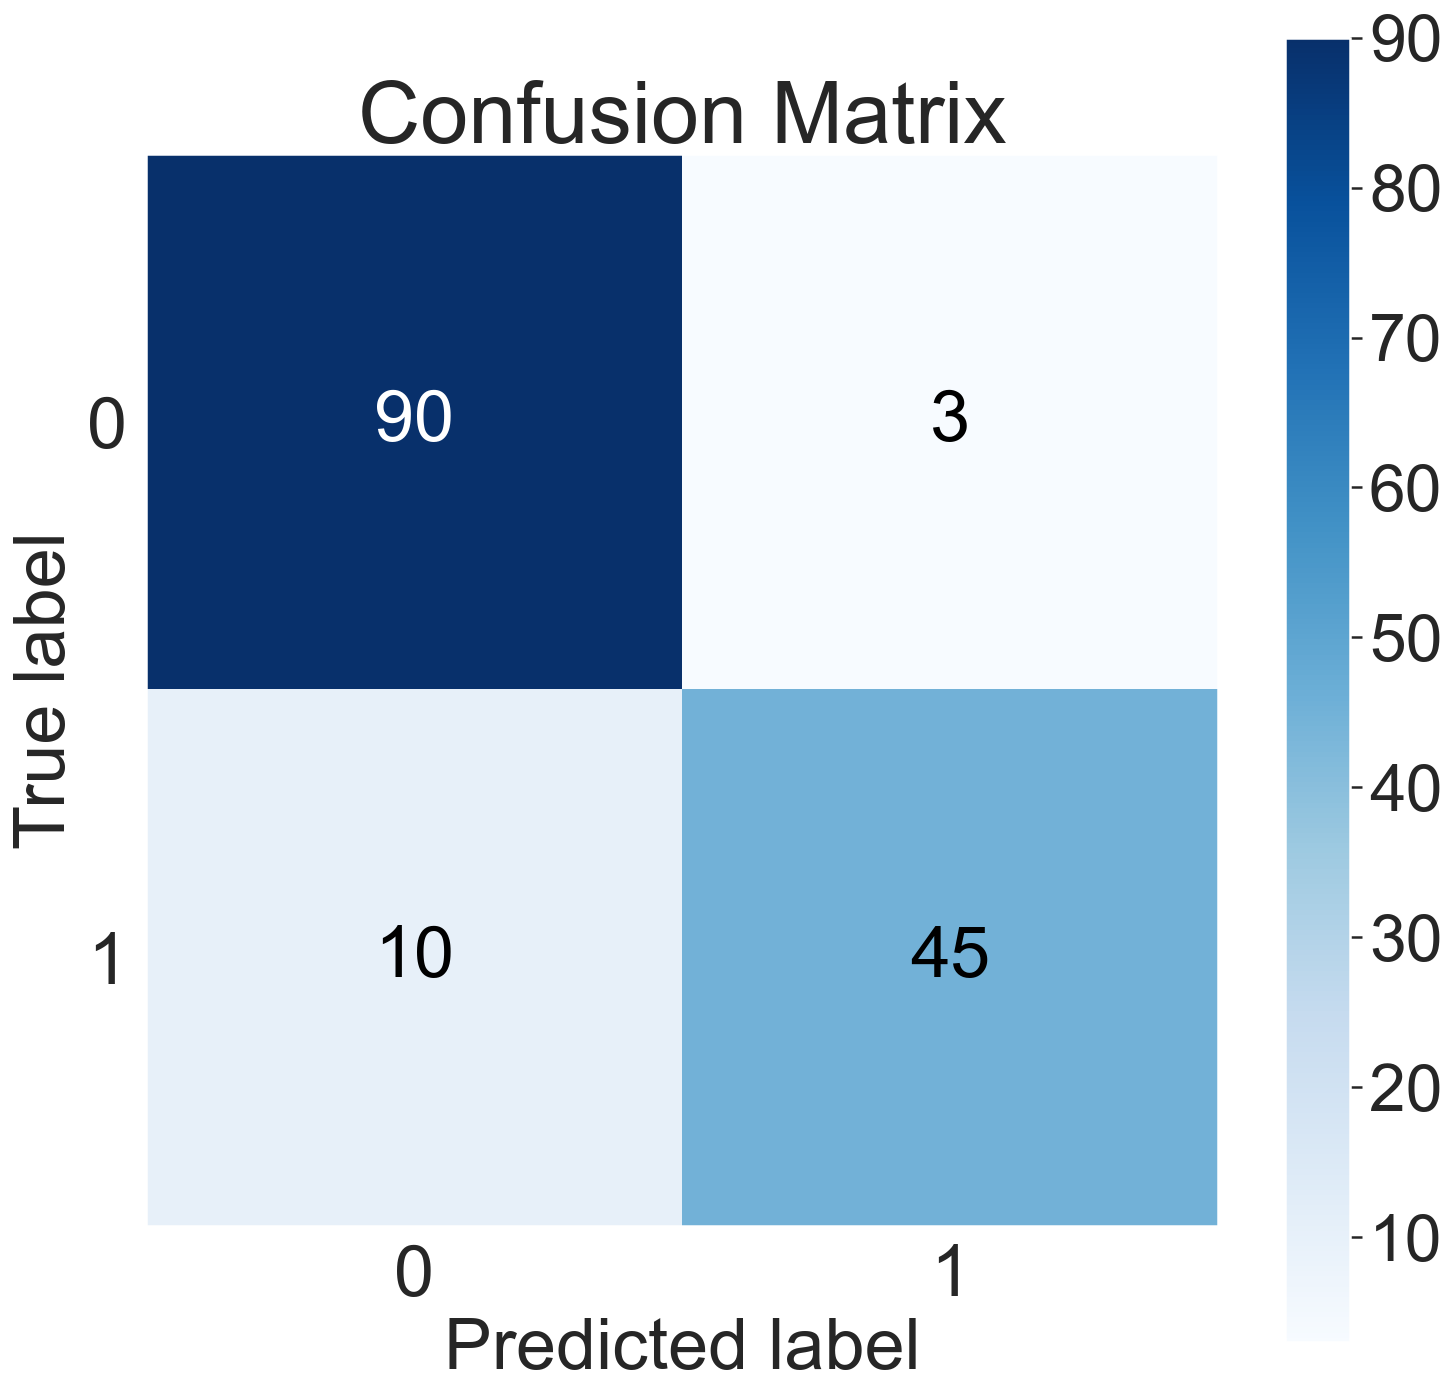

In [16]:
import scikitplot as skplt
import seaborn as sns

sns.set(font_scale=3.0)

skplt.metrics.plot_confusion_matrix(
    y_test, 
    predicted_SVN_poly,
    figsize=(12,12))